In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "grey1": "#aeb7bc",
    "grey2": "#c3cace",
    "grey3": "#d9dde0",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main.values())
sns.set_palette(_30k)

# ← → ↓ ↑


def _30k_path_effects(linewidth=2.5, foreground=_30k_text['bg_cream'], alpha=1.0, **kwargs):
    return [patheffects.withStroke(linewidth=linewidth, foreground=foreground, alpha=alpha, **kwargs)]

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./csv/MKT_time_vs_n.csv")
df['time_s'] = df['time_ms']/1000

In [3]:
df

,n,time_ms,time_s
0,10,0.2863,0.000286
1,20,0.3627,0.000363
2,25,0.3990,0.000399
3,40,0.5220,0.000522
4,50,0.6045,0.000605
5,75,0.8176,0.000818
6,80,0.8521,0.000852
7,100,1.0349,0.001035
8,200,2.0350,0.002035
9,250,2.5814,0.002581


# Plot the whole chart

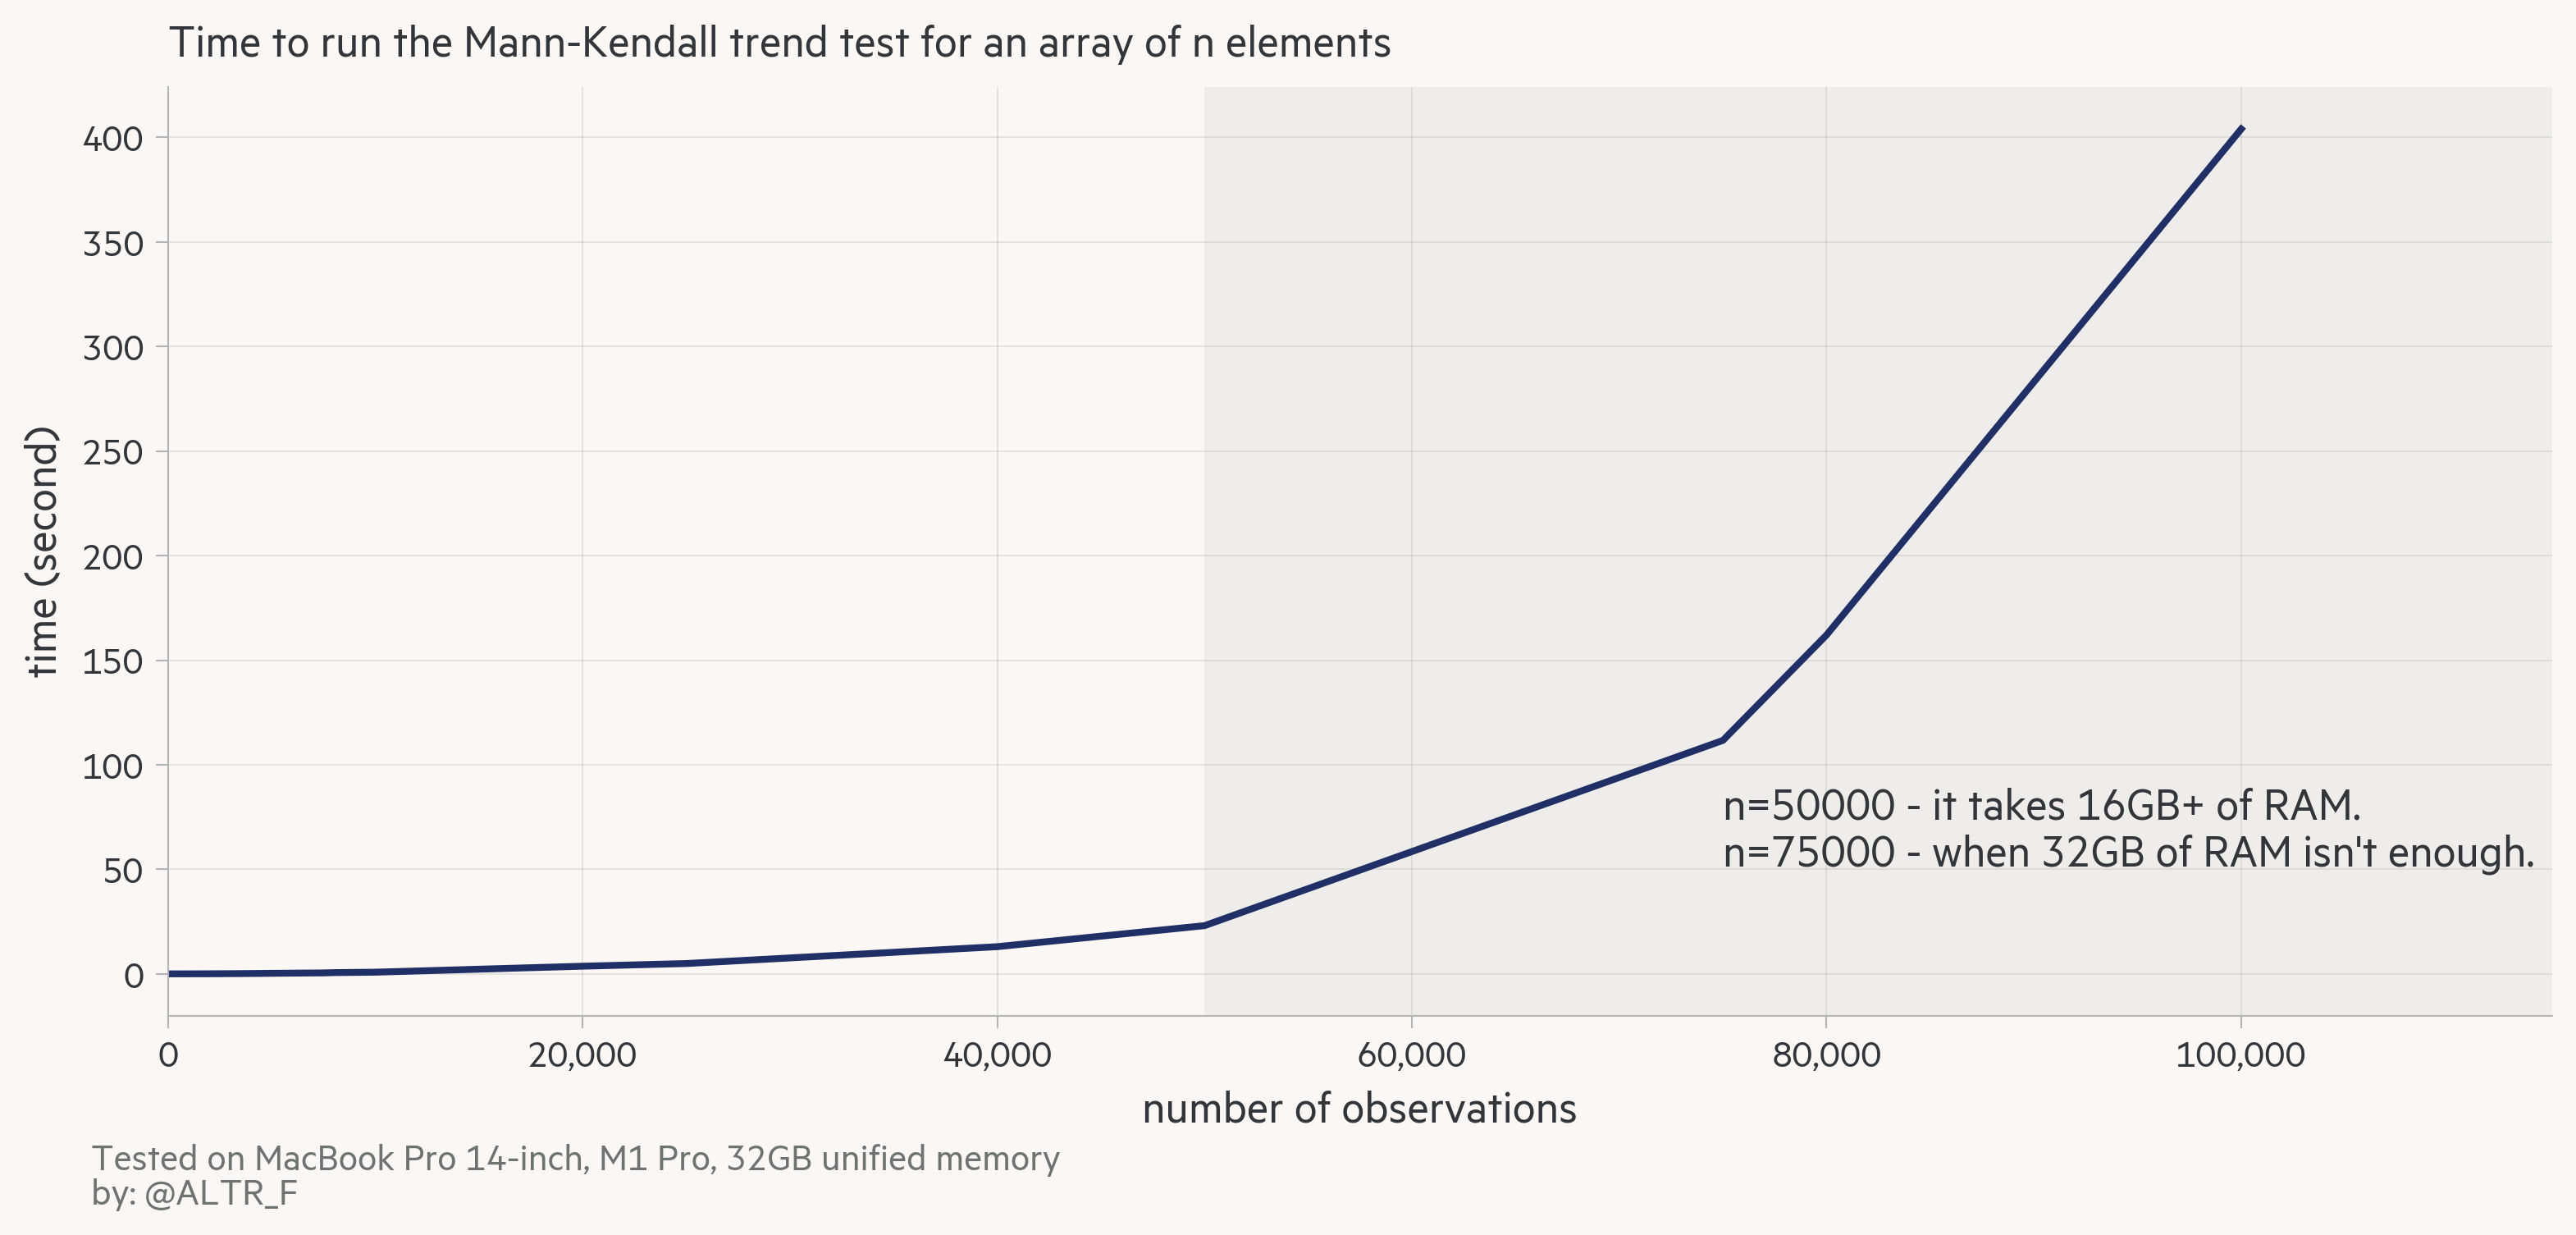

In [6]:
fig = plt.figure()
# fig = plt.figure(figsize=(9, 5))

# Plot things

sns.lineplot(x=df['n'], y=df['time_s'])
plt.axvspan(50000, 120000, color=_30k_text['grey1'], alpha=0.15)

# Annotations

plt.title("Time to run the Mann-Kendall trend test for an array of n elements")

n_start_swap = 75000
text = f"n=50000 - it takes 16GB+ of RAM.\
        \nn={n_start_swap} - when 32GB of RAM isn't enough."
plt.text(n_start_swap, df[df['n'] == n_start_swap]['time_s']*0.8, s=text, va='top')

text = "Tested on MacBook Pro 14-inch, M1 Pro, 32GB unified memory"
plt.figtext(x=0.1, y=0, s=text, color=_30k_text['text_lighter1'], fontsize='small')

text = "by: @ALTR_F"
plt.figtext(x=0.1, y=-0.0275, s=text, color=_30k_text['text_lighter1'], fontsize='small')

# Chart's Anatomy

plt.xlim([0, 115000])
plt.xlabel("number of observations")
plt.ylabel("time (second)")


ax = plt.gca()

ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

# Plot Only small size of observations

<Figure size 3750x1500 with 0 Axes>

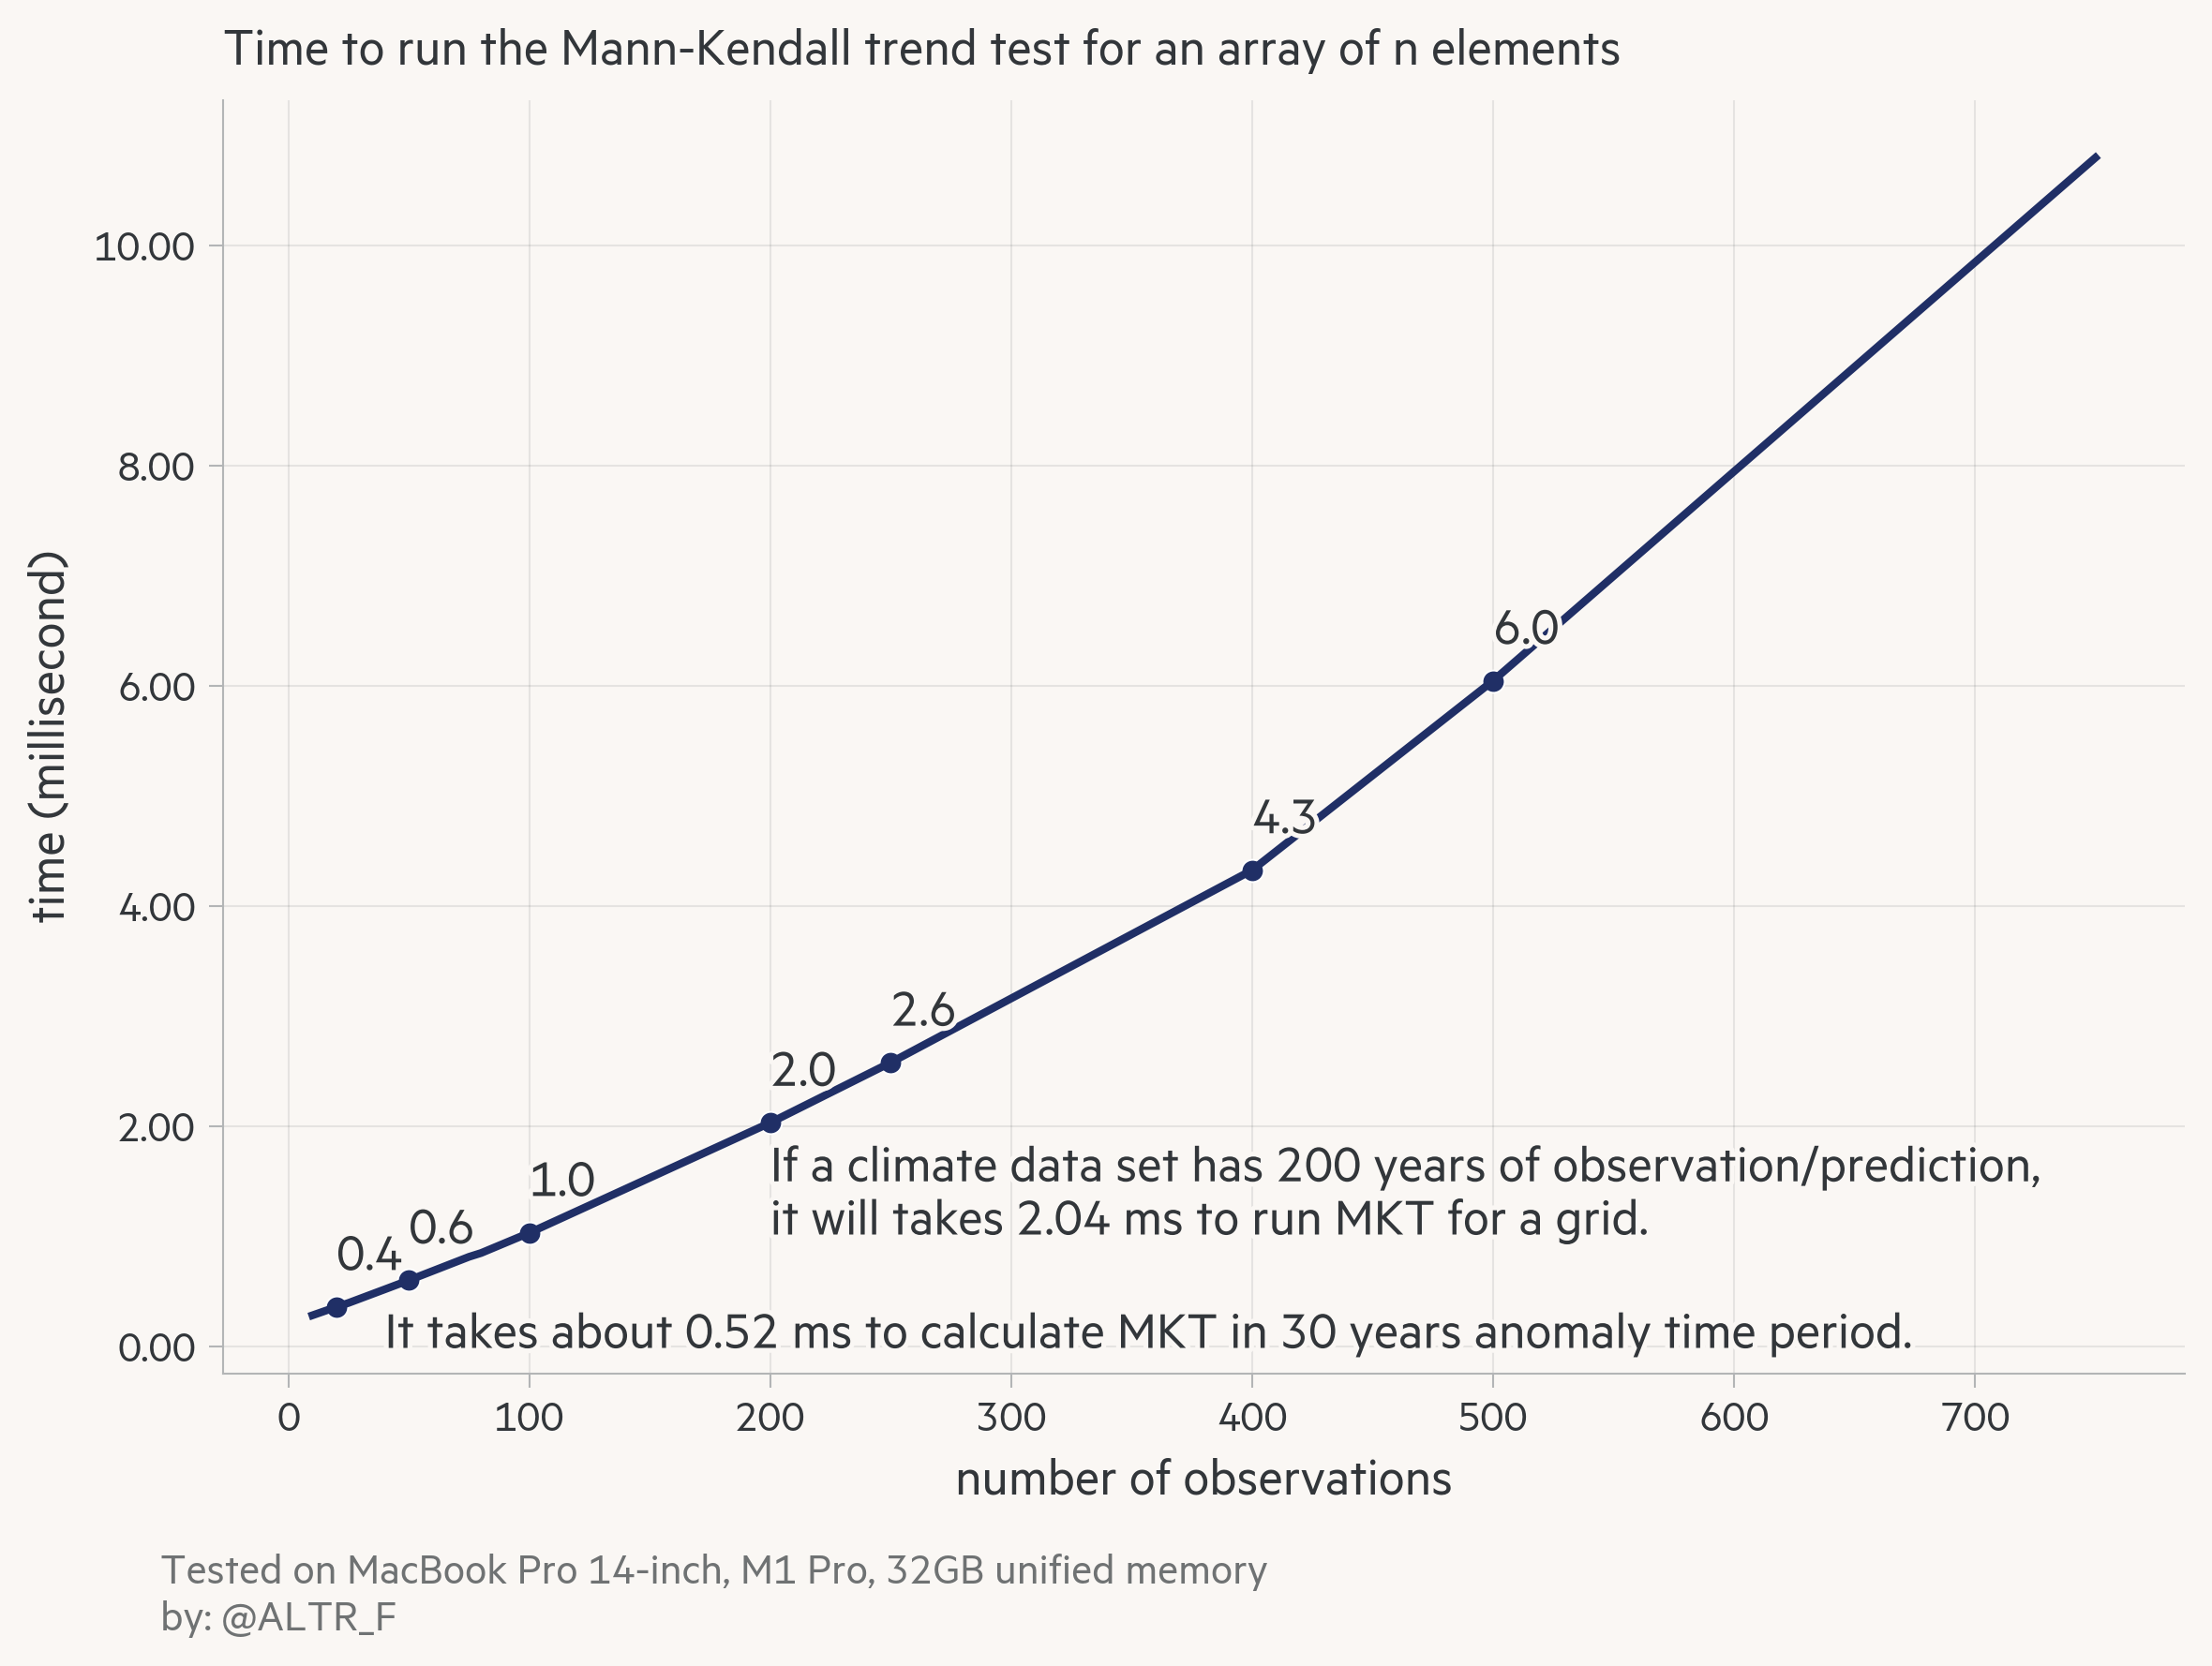

In [5]:
fig = plt.figure()
fig = plt.figure(figsize=(9, 6))

# Plot things

dff = df[df['n'] <= 750]

sns.lineplot(x=dff['n'], y=dff['time_ms'])

# Annotations
plt.title("Time to run the Mann-Kendall trend test for an array of n elements")

interested_n = [20, 50, 100, 200, 250, 400, 500]
for i in interested_n:
    time = dff[dff['n'] == i]['time_ms'].values[0]
    y = time + 0.25
    plt.text(x=i, y=y, s=f"{time:.1f}", path_effects=_30k_path_effects(), va='bottom')
    sns.scatterplot(x=[i], y=[time], color=_30k[0])

n = 200
t = dff[dff['n'] == n]['time_ms'].values[0]
text = f"If a climate data set has {n} years of observation/prediction,\n\
it will takes {t:.2f} ms to run MKT for a grid."
plt.text(x=n, y=t-0.2, s=text, va='top', ha='left', path_effects=_30k_path_effects())

n = 40
t = dff[dff['n'] == n]['time_ms'].values[0]
text = f"It takes about {t:.2f} ms to calculate MKT in 30 years anomaly time period."
plt.text(x=n, y=t-0.2, s=text, va='top', ha='left', path_effects=_30k_path_effects())

text = "Tested on MacBook Pro 14-inch, M1 Pro, 32GB unified memory"
plt.figtext(x=0.1, y=0, s=text, color=_30k_text['text_lighter1'], fontsize='small')

text = "by: @ALTR_F"
plt.figtext(x=0.1, y=-0.0275, s=text, color=_30k_text['text_lighter1'], fontsize='small')

# Chart's Anatomy

plt.xlabel("number of observations")
plt.ylabel("time (millisecond)")

ax = plt.gca()

ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.2f}"))

plt.show()